In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy
import corner
import pymc3 as pm
import os
import time

import sys
sys.path.append("../theano_ops")
sys.path.append("../codebase")
from data_preprocessing_ogle import process_data
from plotting_utils import *

import emcee
import celerite
from celerite.modeling import Model # an abstract class implementing the 
# skeleton of the celerite modeling protocol
from celerite import terms as celerite_terms 

from scipy.special import gamma
from scipy.stats import invgamma
from scipy.optimize import fsolve

In [3]:
events = [] # event names
lightcurves = [] # data for each event
 
i = 0
n_events = 5
for entry in os.scandir('/home/star/fb90/data/OGLE_ews/2017/'):
    if entry.is_dir() and (i < n_events):
        events.append(entry.name)
        photometry = np.genfromtxt(entry.path + '/phot.dat', usecols=(0,1,2))
        lightcurves.append(photometry)
        i = i + 1
        
print("Loaded events:", events)

Loaded events: ['blg-0001', 'blg-0002', 'blg-0003', 'blg-0004', 'blg-0005']


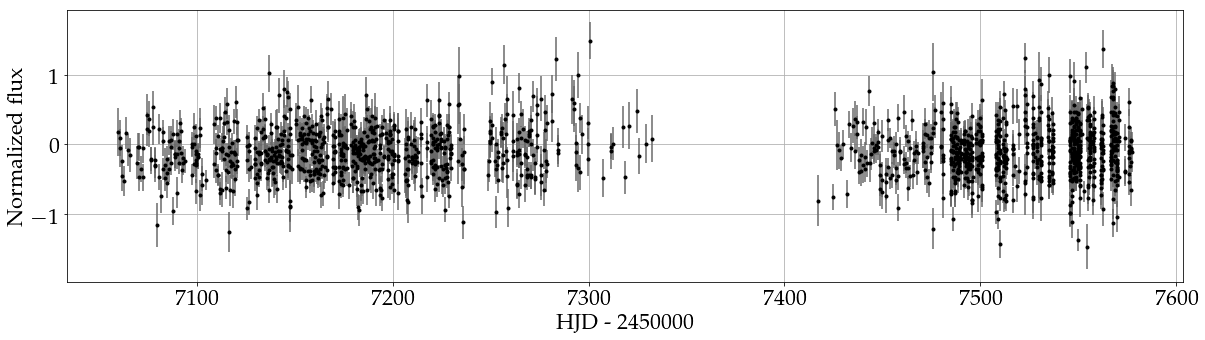

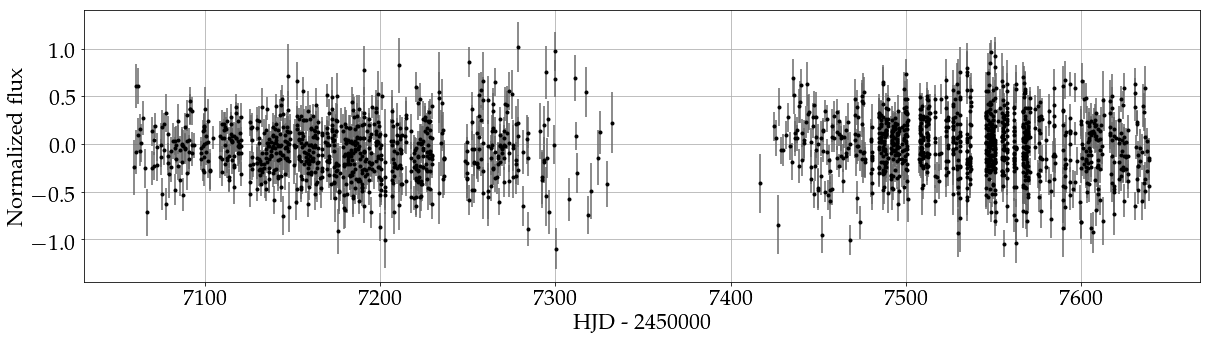

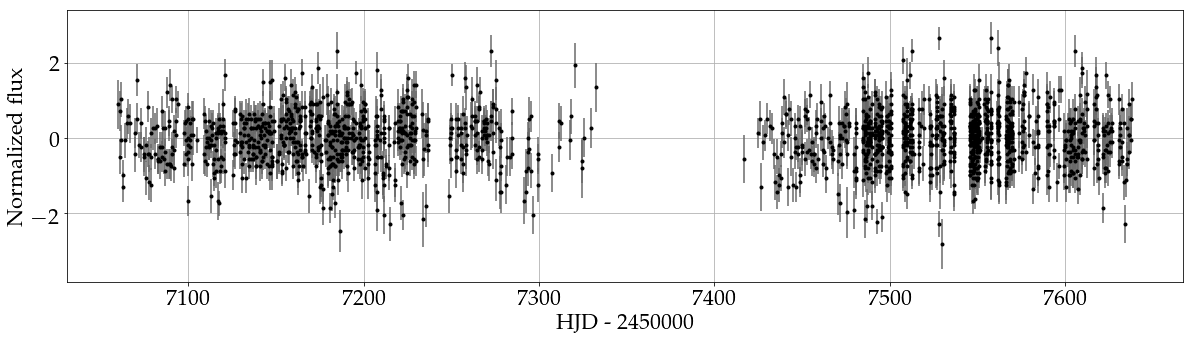

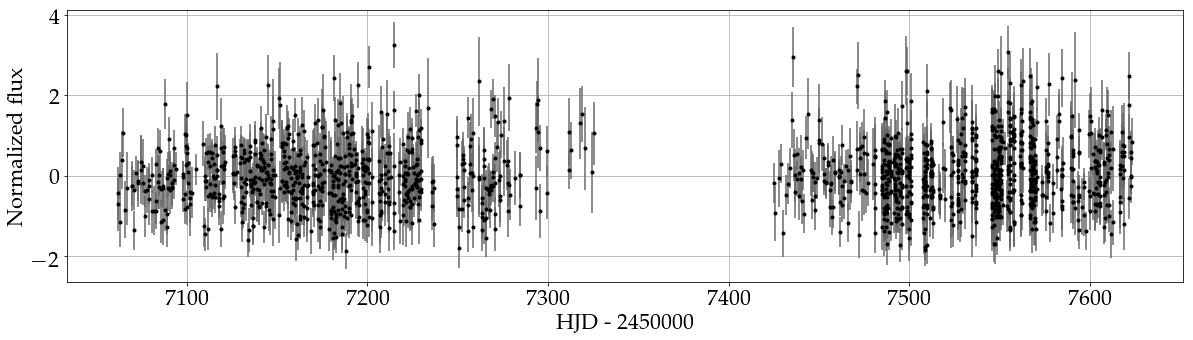

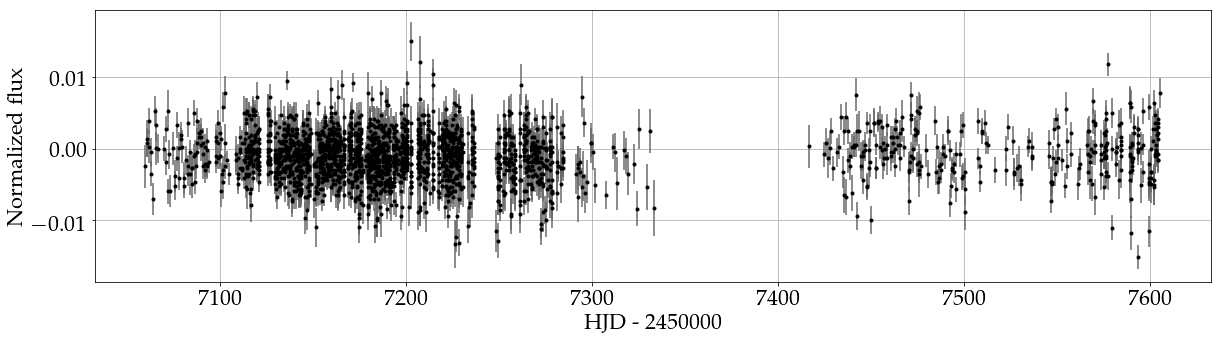

In [26]:
limits = [1700, 1900, 1900, 1700, 2500]

for event_index, lightcurve in enumerate(lightcurves):
    # Pre process the data
    t, F, sigF = process_data(lightcurve[:, 0], lightcurve[:, 1], 
        lightcurve[:, 2], standardize=True)
    
    t = t[:limits[event_index]]
    F = F[:limits[event_index]]
    sigF = sigF[:limits[event_index]]

    fig, ax = plt.subplots(figsize=(20, 5))
    plot_data(ax, t, F, sigF)